# Project 3: House Price Prediction

Objective: Predict house prices based on various features like location, size, and house
characteristics.

## Model Building: Train and evaluate at least TWO machine learning models to predict the target variable.

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [4]:
df = pd.read_csv("cleaned_house_data.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


## Gradient Boosting Regression Model

**working on log transform of y target label**

**Separate out the data into X features and y target label**

In [5]:
X = df.drop(['Property_Sale_Price_natural_log','Property_Sale_Price'],axis=1)
y = df['Property_Sale_Price']
log_y = df['Property_Sale_Price_natural_log']

**Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_train_log, X_test_log, log_y_train, log_y_test = train_test_split(X, log_y, test_size=0.1, random_state=101)


**Scale the X train and X test data.**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [10]:
scaler_log = StandardScaler()
scaled_X_train_log = scaler.fit_transform(X_train_log)
scaled_X_test_log = scaler.transform(X_test_log)

**Use a GridSearchCV to run a grid search for the best GradientBoostingRegressor() parameters.**

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
model = GradientBoostingRegressor()

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    "min_samples_split": [5],
     "loss": ["squared_error"]
}

In [14]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)


**Working with normal y**

In [15]:
grid_search.fit(scaled_X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'loss': ['squared_error'], 'max_depth': [3, 5],
                         'min_samples_split': [5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [16]:
grid_search.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 200}

In [17]:
grid_preds = grid_search.predict(scaled_X_test)

**Evaluate your model's performance on the unseen 10% scaled test set. Using MAE and a RMSE**

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [19]:
MAE = mean_absolute_error(y_test,grid_preds)
#% error from mean
(MAE *100)/180149.242279

9.243874580343695

In [20]:
MSE = mean_squared_error(y_test,grid_preds)
RMSE = np.sqrt(MSE)
#% error from mean
(RMSE *100)/180149.242279

14.809390188809298

In [21]:
r2 = r2_score(y_test, grid_preds)
#% error from mean
r2

0.8969248338135122

**Working with normal log transform of y**

In [22]:
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    "min_samples_split": [5],
     "loss": ["squared_error"]
}

In [23]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)

In [24]:
grid_search.fit(scaled_X_train_log,log_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'loss': ['squared_error'], 'max_depth': [3, 5],
                         'min_samples_split': [5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 200}

In [26]:
grid_preds_log = grid_search.predict(scaled_X_test_log)

**Evaluate your model's performance on the unseen 10% scaled test set. Using MAE and a RMSE**

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [28]:
MAE = mean_absolute_error(log_y_test,grid_preds_log)
#% error from mean
(MAE*100)/12.021984

0.6893067319332422

In [29]:
MSE = mean_squared_error(log_y_test,grid_preds_log)
RMSE = np.sqrt(MSE)
#% error from mean
(RMSE*100)/12.021984

0.9280971796259372

In [30]:
r2 = r2_score(log_y_test,grid_preds_log)
#% error from mean
r2

0.9294725899433147

Histogram of Prices: Shows the distribution of house prices before and after log transformation

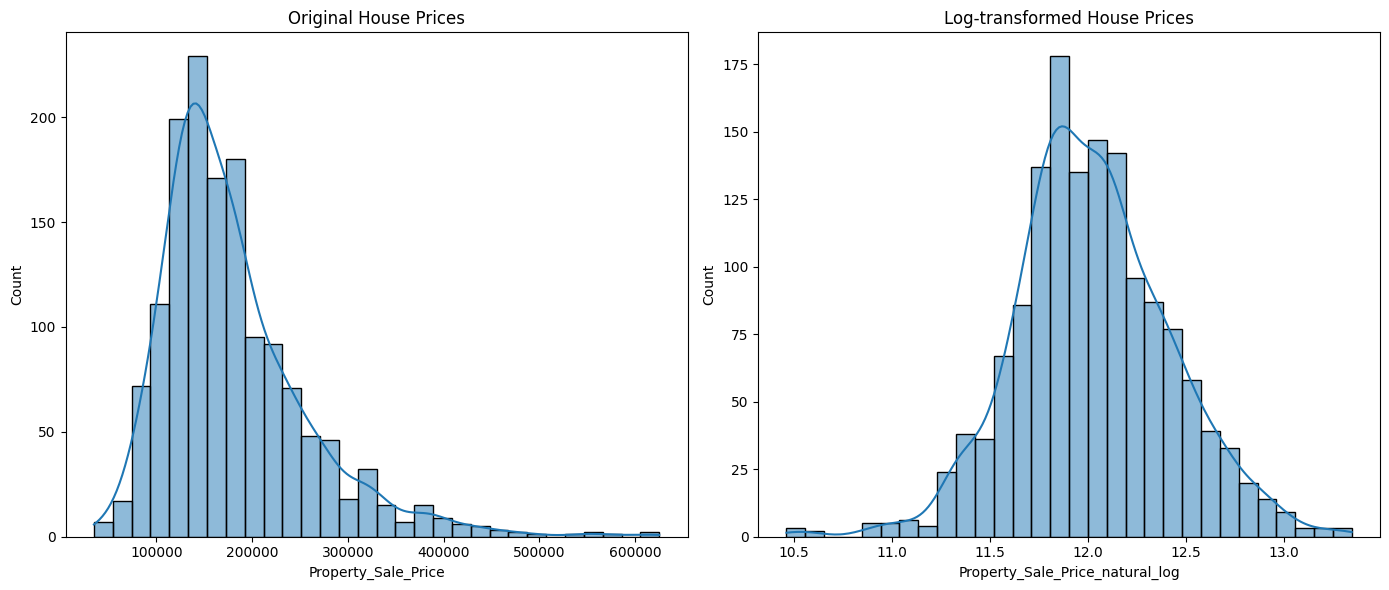

In [31]:
plt.figure(figsize=(14, 6))

# Original Prices
plt.subplot(1, 2, 1)
sns.histplot(df['Property_Sale_Price'], bins=30, kde=True)
plt.title('Original House Prices')

# Log-transformed Prices
plt.subplot(1, 2, 2)
sns.histplot(df['Property_Sale_Price_natural_log'], bins=30, kde=True)
plt.title('Log-transformed House Prices')

plt.tight_layout()
plt.show()


Predicted vs Actual Plot: Helps visualize how well the model is predicting house prices.
comparing the logged target output with the original one


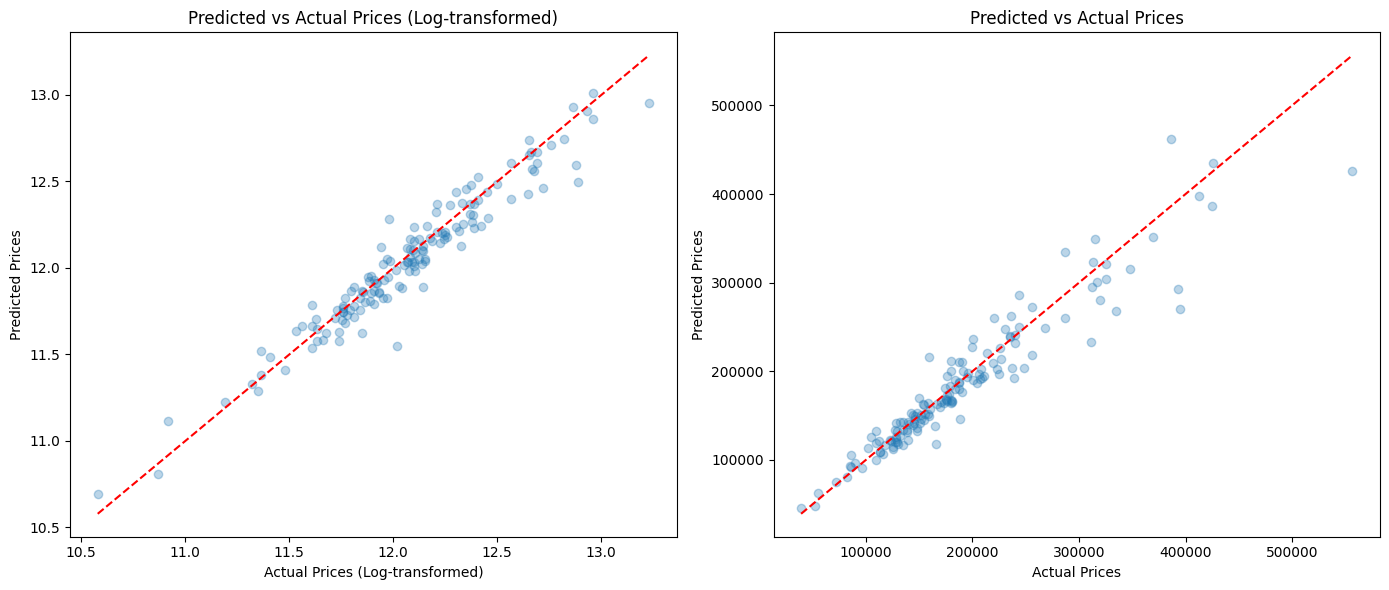

In [58]:
# Create figure for two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Log-transformed Prices
plt.subplot(1, 2, 1)
plt.scatter(log_y_test, grid_preds_log, alpha=0.3)
plt.plot([min(log_y_test), max(log_y_test)], [min(log_y_test), max(log_y_test)], 'r--')  # Identity line
plt.xlabel('Actual Prices (Log-transformed)')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices (Log-transformed)')

# Subplot 2: Original Prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, grid_preds, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Identity line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')

# Adjust layout
plt.tight_layout()

# Show both subplots together
plt.show()


----

Residual Plot: Helps detect any bias or systematic error in the model.


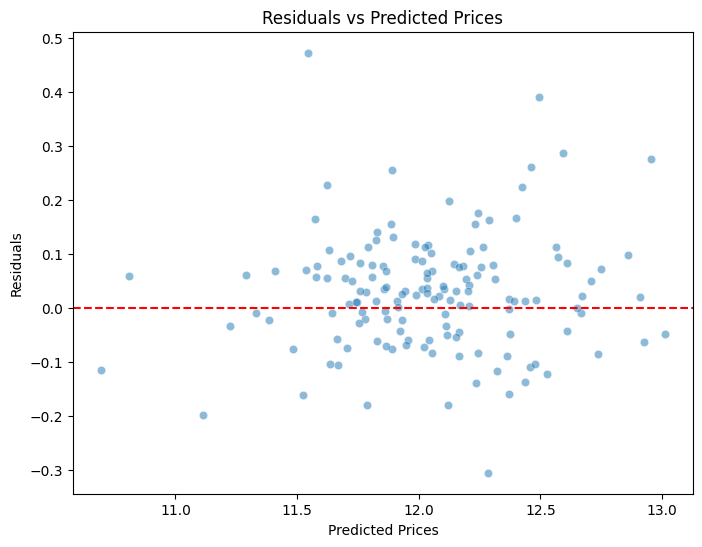

In [33]:
# Residuals
residuals = log_y_test - grid_preds_log

# Plot Residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=grid_preds_log, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

Feature Importance Plot: Highlights which features are most influential in predicting house prices.


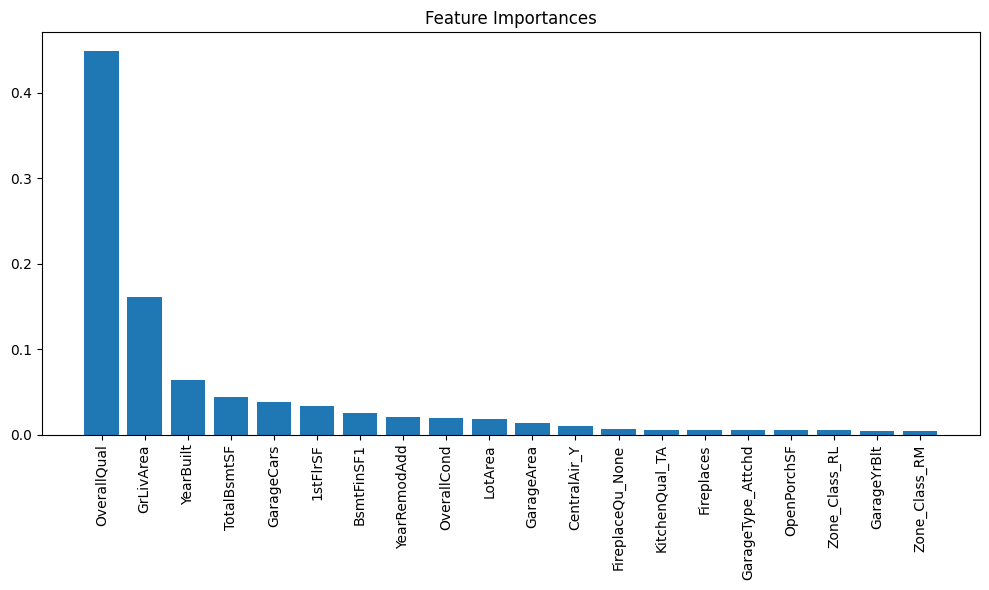

In [43]:
# Feature importance from the model
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# Select the top 10 features
num_features_to_show = 20
indices = indices[:num_features_to_show]

# Getting the names for top N features
feature_names = X.columns[indices]  # Indexing using the top N indices

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(num_features_to_show), importances[indices], align='center')
plt.xticks(range(num_features_to_show), feature_names, rotation=90)  # Use updated feature_names
plt.tight_layout()
plt.show()